In [8]:
# Import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/content/phishing_site_urls.csv')

In [10]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [11]:
df.shape

(549346, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [13]:
df.isnull().sum()

,0
URL,0
Label,0


In [14]:
df.Label.value_counts()

,count
Label,
good,392924
bad,156422


In [15]:
from nltk.tokenize import RegexpTokenizer

In [16]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [17]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [18]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [19]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [20]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [21]:
from nltk.stem.snowball import SnowballStemmer

In [22]:
stemmer = SnowballStemmer('english')

In [23]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [24]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [25]:
df['text'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [26]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [27]:
good_sites = df[df.Label == 'good']
bad_sites = df[df.Label == 'bad']


In [28]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [29]:
!pip install wordcloud

In [30]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
  stopwords = set(STOPWORDS)
  more_stopwords = {'com','http'}
  stopwords = stopwords.union(more_stopwords)

  wordcloud = WordCloud(background_color='white',
                        stopwords = stopwords,
                        max_words = max_words,
                        max_font_size = max_font_size,
                        random_state = 42,
                        mask = mask)
  wordcloud.generate(text)

  plt.figure(figsize=figure_size)
  if image_color:
      image_colors = ImageColorGenerator(mask);
      plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
      plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
  else:
      plt.imshow(wordcloud);
      plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
  plt.axis('off');
  plt.tight_layout()


In [31]:
all_text = ' '.join(good_sites['text'].tolist())

In [32]:
from wordcloud import WordCloud

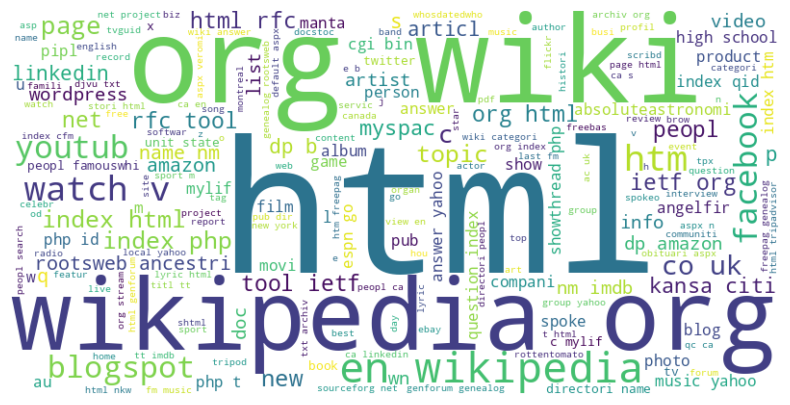

In [33]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 10).generate(all_text)

# Display the word cloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [34]:
all_text = ' '.join(bad_sites['text'].tolist())

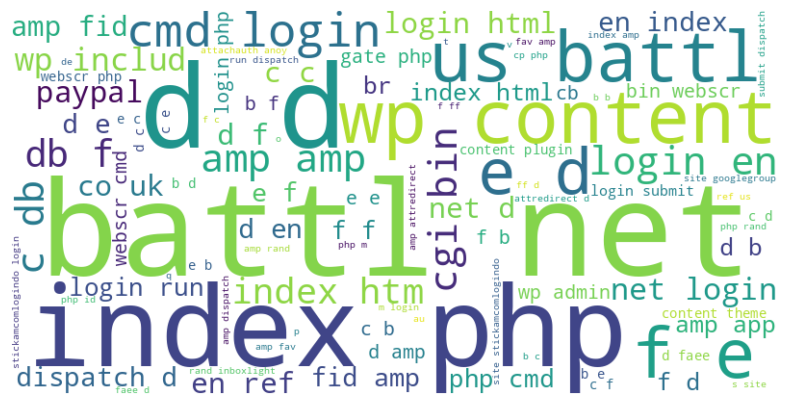

In [35]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 10).generate(all_text)

# Display the word cloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer()

In [39]:
features = cv.fit_transform(df.text)

In [40]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, df.Label, test_size=0.2, random_state=42)

# **Model Training**  

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
l_model = LogisticRegression()

In [45]:
l_model.fit(x_train, y_train)

LogisticRegression()

In [46]:
l_model.score(x_test, y_test)

0.9642850641667425

In [47]:
l_model.score(x_train, y_train)

0.9782013124721259

In [48]:
from sklearn.metrics import classification_report

In [49]:
print('\nClassification Report\n')
print(classification_report(l_model.predict(x_test), y_test,
                            target_names = ['Bad','Good']))


Classification Report

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.94     29170
        Good       0.99      0.96      0.98     80700

    accuracy                           0.96    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.96      0.96    109870



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test), y_test),
                       columns = ['Predicted:Bad','Predicted:Good'],
                       index = ['Actual:Bad','Actual:Good'])


Confusion Matrix



<Axes: >

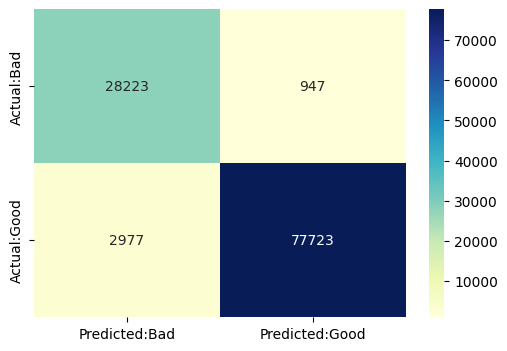

In [52]:
print('\nConfusion Matrix\n')
plt.figure(figsize = (6,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

In [53]:
from sklearn.naive_bayes  import MultinomialNB

In [54]:
mnb = MultinomialNB()

In [55]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [56]:
mnb.score(x_test, y_test)

0.958359879858014

In [60]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier #For ensemble classification using multiple decision trees.

rf_model = RandomForestClassifier(
    n_estimators=50,      # kam tree
    max_depth=10,         # depth limit
    n_jobs=-1,            # sabhi CPU core ka use
    random_state=42
)


In [61]:
# Sirf 10,000 rows ka subset use karo training ke liye
x_small = x_train[:10000]
y_small = y_train[:10000]

rf_model.fit(x_small, y_small)


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [62]:
import time

start = time.time()
rf_model.fit(x_train, y_train)
end = time.time()

print(f"Training Time: {end - start:.2f} seconds")


Training Time: 106.89 seconds


In [64]:
rf_model.score(x_test, y_test)

0.7167470647128424

In [65]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier #For Decision Tree classification

dt_model = DecisionTreeClassifier(
    max_depth=10,          # limit tree depth
    min_samples_split=10,  # minimum samples required to split
    min_samples_leaf=5,    # minimum samples in leaf
    random_state=42
)

In [66]:
dt_model.fit(x_train[:10000], y_train[:10000])


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [67]:
start = time.time()
dt_model.fit(x_train, y_train)
end = time.time()
print(f"Training Time: {end - start:.2f} seconds")


Training Time: 184.81 seconds


In [68]:
dt_model.score(x_test, y_test)

0.8524984072085191

In [78]:
# Support Vector Machine
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=1.0,
    max_iter=10000,     # increase iterations if needed
    random_state=42
)



In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [82]:
svm_model.fit(x_train_scaled[:2000], y_train[:2000])


LinearSVC(max_iter=10000, random_state=42)

In [83]:
start = time.time()
svm_model.fit(x_train_scaled, y_train)
end = time.time()

print(f"Training Time: {end - start:.2f} seconds")

Training Time: 936.25 seconds


In [84]:
svm_model.score(x_test_scaled, y_test)

0.9524802038773096

# **Save Model**

In [85]:
import pickle

In [86]:
pickle.dump(l_model, open('model.pkl', 'wb'))

In [104]:
pickle.dump(mnb, open('mnb.pkl', 'wb'))

In [87]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))


* Bad links => this are phishing sites

yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites

www.youtube.com/
youtube.com/watch?v=qIOTQJI3vdu
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html


In [95]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php', 'fazan-pacir.rs/temp/libraries/ipad', 'tubemoviez.exe', 'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1']
predict_good = ['www.youtube.com/', 'youtube.com/watch?v=qIOTQJI3vdU', 'retailhellunderground.com/', 'restorevisioncenters.com/html/technology.html']

In [96]:
predict_good = cv.transform(predict_good)

In [97]:
predict_bad = cv.transform(predict_bad)

In [98]:
l_model.predict(predict_good)

array(['good', 'good', 'good', 'good'], dtype=object)

In [99]:
l_model.predict(predict_bad)

array(['bad', 'bad', 'bad', 'bad'], dtype=object)

In [100]:
mnb.predict(predict_good)

array(['good', 'good', 'good', 'good'], dtype='<U4')

In [101]:
mnb.predict(predict_bad)

array(['bad', 'bad', 'bad', 'bad'], dtype='<U4')

In [102]:
svm_model.predict(predict_good)

array(['good', 'good', 'bad', 'bad'], dtype=object)

In [103]:
svm_model.predict(predict_bad)

array(['bad', 'bad', 'bad', 'bad'], dtype=object)